<a href="https://colab.research.google.com/github/andre-coimbra-ifg/CTG_RP_PC/blob/master/CTG_RP_Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Config Colab Instance

Install packages and download libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download config file from GitHub Repo

Include any default source files

In [2]:
! rm config_local.py
! wget https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/config_local.py

rm: cannot remove 'config_local.py': No such file or directory
--2025-02-10 16:54:46--  https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/config_local.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2379 (2.3K) [text/plain]
Saving to: ‘config_local.py’

config_local.py     100%[===================>]   2.32K  --.-KB/s    in 0s      

2025-02-10 16:54:46 (30.6 MB/s) - ‘config_local.py’ saved [2379/2379]



In [3]:
from config_local import get_rp_github_src_files

### Download other specified files from src folder

In [4]:
get_rp_github_src_files()

Beginning file download of file generate_recurrence_images.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/generate_recurrence_images.py
Beginning file download of file libRP.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/libRP.py
Beginning file download of file basic_denoise.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/basic_denoise.py
Beginning file download of file compute_metadata.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/compute_metadata.py
Beginning file download of file ctg_utils.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/ctg_utils.py
Beginning file download of file simple_test.py
https://raw.githubusercontent.com/andre-coimbra-ifg/CTG_RP_PC/master/src/simple_test.py
Done


In [5]:
! ls

basic_denoise.py     config_local.py  generate_recurrence_images.py  __pycache__  simple_test.py
compute_metadata.py  ctg_utils.py     libRP.py			     sample_data


In [6]:
# test code
import simple_test as test
test.test()

Hi There


## Install Packages Dependencies

In [7]:
! pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [8]:
! pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.7 MB/s eta 0:00:00


## Download CTU-UHB Database

In [9]:
# !pwd

In [9]:
#!rsync -Cavz physionet.org::ctu-uhb-ctgdb  /content/ctu-uhb-ctgdb
# !wget -r -N -c -np -nv -P /content/ctu-uhb-ctgdb https://physionet.org/files/ctu-uhb-ctgdb/1.0.0/
!gdown 1h_qlULLpSR9fAJvzeE1Zkq2C2aIuB-N9
!unzip "/content/ctu-uhb-ctgdb.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1h_qlULLpSR9fAJvzeE1Zkq2C2aIuB-N9
To: /content/ctu-uhb-ctgdb.zip
100% 14.4M/14.4M [00:00<00:00, 80.3MB/s]
Archive:  /content/ctu-uhb-ctgdb.zip
   creating: /content/ctu-uhb-ctgdb/
  inflating: /content/ctu-uhb-ctgdb/1220.dat  
  inflating: /content/ctu-uhb-ctgdb/1234.dat  
  inflating: /content/ctu-uhb-ctgdb/1208.dat  
  inflating: /content/ctu-uhb-ctgdb/1038.hea  
  inflating: /content/ctu-uhb-ctgdb/1004.hea  
  inflating: /content/ctu-uhb-ctgdb/1010.hea  
  inflating: /content/ctu-uhb-ctgdb/1022.dat  
  inflating: /content/ctu-uhb-ctgdb/1036.dat  
  inflating: /content/ctu-uhb-ctgdb/2041.hea  
  inflating: /content/ctu-uhb-ctgdb/1206.hea  
  inflating: /content/ctu-uhb-ctgdb/1212.hea  
  inflating: /content/ctu-uhb-ctgdb/1156.dat  
  inflating: /content/ctu-uhb-ctgdb/1142.dat  
  inflating: /content/ctu-uhb-ctgdb/1399.hea  
  inflating: /content/ctu-uhb-ctgdb/1428.hea  
  inflating: /content/ctu-uhb-ctgdb/1195.dat  
  inflating: /co

In [11]:
# !mv /content/ctu-uhb-ctgdb/physionet.org/files/ctu-uhb-ctgdb/1.0.0/* /content/ctu-uhb-ctgdb
# !rm -r /content/ctu-uhb-ctgdb/physionet.org

In [10]:
!ls /content/ctu-uhb-ctgdb/

1001.dat  1063.dat  1125.dat  1187.dat	1249.dat  1311.dat  1373.dat  1435.dat	1497.dat
1001.hea  1063.hea  1125.hea  1187.hea	1249.hea  1311.hea  1373.hea  1435.hea	1497.hea
1002.dat  1064.dat  1126.dat  1188.dat	1250.dat  1312.dat  1374.dat  1436.dat	1498.dat
1002.hea  1064.hea  1126.hea  1188.hea	1250.hea  1312.hea  1374.hea  1436.hea	1498.hea
1003.dat  1065.dat  1127.dat  1189.dat	1251.dat  1313.dat  1375.dat  1437.dat	1499.dat
1003.hea  1065.hea  1127.hea  1189.hea	1251.hea  1313.hea  1375.hea  1437.hea	1499.hea
1004.dat  1066.dat  1128.dat  1190.dat	1252.dat  1314.dat  1376.dat  1438.dat	1500.dat
1004.hea  1066.hea  1128.hea  1190.hea	1252.hea  1314.hea  1376.hea  1438.hea	1500.hea
1005.dat  1067.dat  1129.dat  1191.dat	1253.dat  1315.dat  1377.dat  1439.dat	1501.dat
1005.hea  1067.hea  1129.hea  1191.hea	1253.hea  1315.hea  1377.hea  1439.hea	1501.hea
1006.dat  1068.dat  1130.dat  1192.dat	1254.dat  1316.dat  1378.dat  1440.dat	1502.dat
1006.hea  1068.hea  1130.hea  1192.hea	1254

# Generate Recurrence Plots and Datasets

## Import libraries

In [11]:
import config_local
from config_local import *

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import gc #garbage collector

from fastai.vision.all import *

import torch
from torch import nn

# import collections
# import pprint
import random

In [13]:
from compute_metadata import generate_list, save_label_file
from generate_recurrence_images import generate_rp_images_segment, gen_recurrence_params

## Config
Configure Recurrence Plot Parameters

In [22]:
np.random.seed(1234)
random.seed(1234)

POLICY='late_valid' # 'best_quality', 'early_valid', 'late_valid'
SEG_LENGTH = 10

IMAGES_DIR = '/content/images_{}_{}min'.format(POLICY, SEG_LENGTH)
print(IMAGES_DIR)

# rp_params = gen_recurrence_params(dimensions=[2], time_delays=[1], percentages=[3], use_clip_vals=[False])
rp_params = gen_recurrence_params(dimensions=[2], time_delays=[1], percentages=[3, 10], use_clip_vals=[False])
# rp_params = gen_recurrence_params(dimensions=[2, 3], time_delays=list(range(1,11)), percentages=list(range(1,11)), use_clip_vals=[False])
len(rp_params), rp_params

/content/images_late_valid_10min


(2,
 [{'dimension': 2, 'time_delay': 1, 'percentage': 3, 'use_clip': False},
  {'dimension': 2, 'time_delay': 1, 'percentage': 10, 'use_clip': False}])

In [23]:
tfms=[]
size=224
bs=64
workers=4

## Generate Recurrence Plots

Making sure images are generated correctly

In [21]:
!rm -R '{IMAGES_DIR}'


Record: 1001  Samples: 19200   Duration: 80.0 min   Stage.II: 20 min


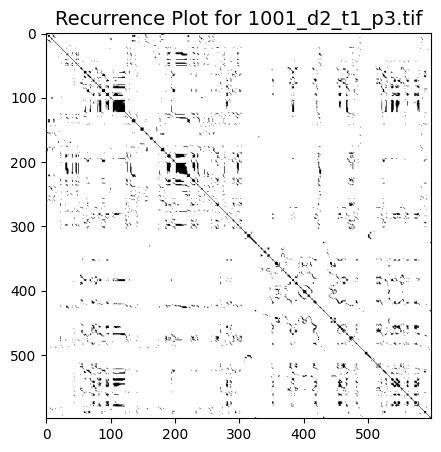

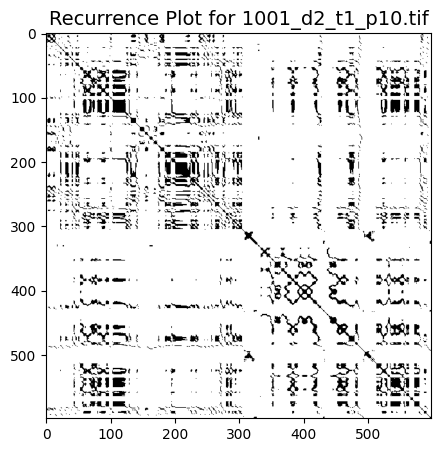


Record: 1002  Samples: 19200   Duration: 80.0 min   Stage.II: 20 min


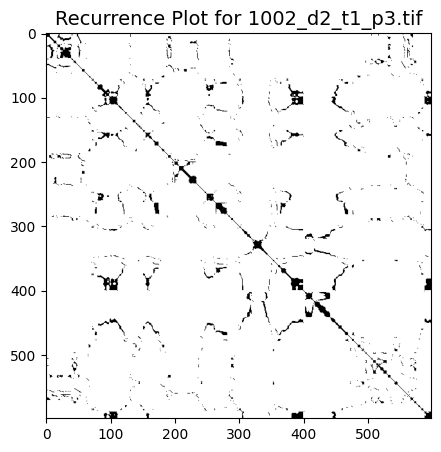

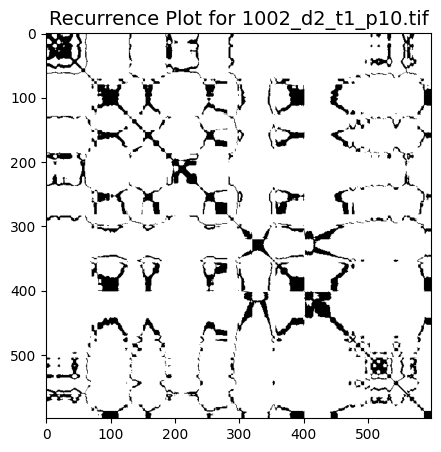

(2, 4)

In [24]:
generate_rp_images_segment(RECORDINGS_DIR, images_dir=IMAGES_DIR, rp_params=rp_params,
                           policy=POLICY, show_signal=False, show_image=True, verbose=True, cmap='binary',
                           limit=2, max_seg_min=SEG_LENGTH, n_dec=4)

In [ ]:
# !zip -r '{IMAGES_DIR}'.zip '{IMAGES_DIR}'/

# from google.colab import files
# files.download(f'{IMAGES_DIR}.zip')

Generating the images from all samples

In [25]:
generate_rp_images_segment(RECORDINGS_DIR, images_dir=IMAGES_DIR, rp_params=rp_params,
                           policy=POLICY, show_signal=False, show_image=False, verbose=False,
                           cmap='binary', max_seg_min=SEG_LENGTH, n_dec=4)

(552, 1104)

In [84]:
# !cat '{IMAGES_DIR}/rp_images_index.json'

## Generate Train and Valid Label Files

In [26]:
# train_valid_groups_full = get_splits(image_dir=images_path, image_file='rp_images_index.json',
#                                      exclude=['_clipped'],
#                                      thresh = 7.15, n_splits=2, verbose=False)
# print(train_valid_groups_full[0])
# print(len(train_valid_groups_full[0]['train'][False]))

# TODO: alter the code to remove this step
# Create valid_x.csv files for each split
# for i in range(len(train_valid_groups_full)):
#      generate_lists(train_valid_groups_full[i], train_file='train_{}.csv'.format(i),
#                     valid_file='valid_{}.csv'.format(i))
# generate_label_file(train_valid_groups_full[0], csv_file='labels.csv')

random.seed(1234)

recordings, outcomes, results = generate_list(image_dir=IMAGES_DIR, image_file='rp_images_index.json',
                                              thresh=7.15, key='pH', verbose=True)

save_label_file(results, image_dir=IMAGES_DIR, csv_file='labels.csv')

# Verificando os 5 primeiros registros
recordings[0:5]

  Shuffling data: 105 false records and 447 true.
  Balancing data: choosing 105 of each outcome.


['1438', '1099', '1419', '1075', '1244']

In [163]:
# !ls '{IMAGES_DIR}'/*.csv
# !cat '{IMAGES_DIR}/labels.csv'

In [27]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Carregar o arquivo com labels
df = pd.read_csv(f'{IMAGES_DIR}/labels.csv')

# Extrair o prefixo antes do primeiro "_"
df["prefix"] = df["fname"].apply(lambda x: x.split("_")[0])

# Obter os prefixos únicos
unique_prefixes = df["prefix"].unique()

# Criar os folds garantindo que o mesmo prefixo fique no mesmo conjunto
kf = KFold(n_splits=10, shuffle=True, random_state=42)
folds = {}

# Distribuir os prefixos nos folds
for fold, (train_idx, test_idx) in enumerate(kf.split(unique_prefixes)):
    train_prefixes = unique_prefixes[train_idx]
    test_prefixes = unique_prefixes[test_idx]

    # Selecionar as amostras correspondentes aos prefixos escolhidos
    train_set = df[df["prefix"].isin(train_prefixes)]
    test_set = df[df["prefix"].isin(test_prefixes)]

    folds[fold] = {"train": train_set, "test": test_set}

# # Exibir o tamanho de cada conjunto no primeiro fold como exemplo
folds[0]["train"].shape, folds[0]["test"].shape, folds[0]["train"].head(), folds[0]["test"].head()

((378, 3),
 (42, 3),
                 fname  label prefix
 0   1438_d2_t1_p3.tif      0   1438
 1  1438_d2_t1_p10.tif      0   1438
 2   1099_d2_t1_p3.tif      0   1099
 3  1099_d2_t1_p10.tif      0   1099
 4   1419_d2_t1_p3.tif      0   1419,
                  fname  label prefix
 18   1036_d2_t1_p3.tif      0   1036
 19  1036_d2_t1_p10.tif      0   1036
 30   1452_d2_t1_p3.tif      0   1452
 31  1452_d2_t1_p10.tif      0   1452
 36   1305_d2_t1_p3.tif      0   1305)

In [ ]:
# train_valid_groups_full = get_splits(image_dir='images', image_file='rp_images_index.json',
#                                      exclude=['_clipped'],
#                                      thresh = 7.15)

# # Create valid_x.csv files for each split
# for i in range(len(train_valid_groups_full)):
#     generate_lists(train_valid_groups_full[i], train_file='train_{}.csv'.format(i),
#                    valid_file='valid_{}.csv'.format(i))

#Convolutional Neural Network [CNN]

Set DataLoader

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.311264,0.993613,0.517647,01:28


epoch,train_loss,valid_loss,accuracy,time
0,0.922614,0.886593,0.576471,02:00
1,0.747601,1.074470,0.570588,02:02
2,0.561431,1.232002,0.629412,02:00
3,0.413172,1.269144,0.641176,02:00
4,0.334074,1.388968,0.611765,01:56
5,0.261174,1.532195,0.552941,02:02
6,0.211813,1.352404,0.617647,02:02
7,0.175471,1.311151,0.611765,02:00
8,0.143484,1.309757,0.629412,01:59
9,0.117013,1.318087,0.635294,01:57


Fold 0 - Acurácia no Teste: 0.4762
Fold 0 concluído!


Desempenho médio do modelo:
Acurácia média: 0.4762
Desvio padrão da acurácia: 0.0000
1 - normal (pH greater or equal 7.15)
0 - hypoxia (pH lower than 7.15)


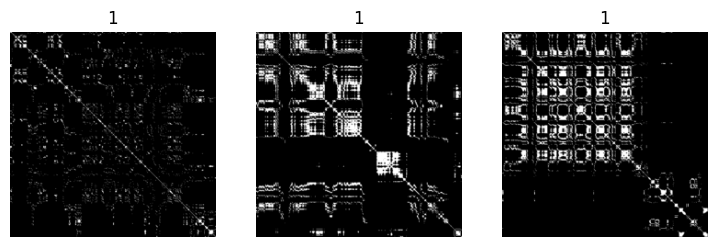

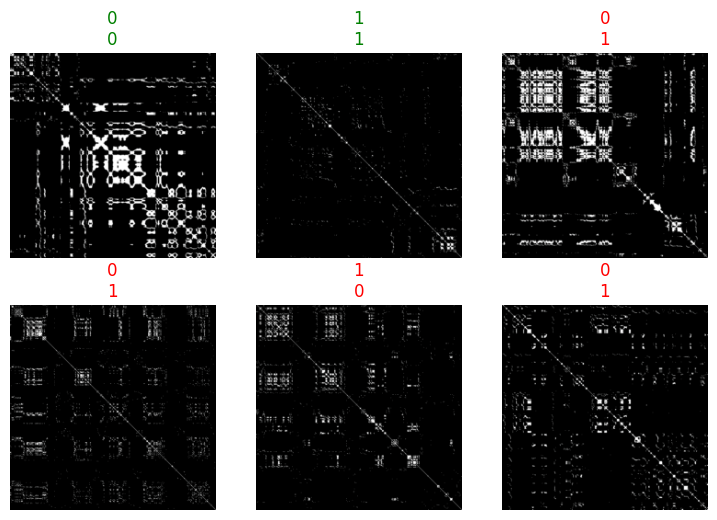

In [20]:
from fastai.vision.all import *

def get_dataloaders(fold, path_to_images, bs=32):
    """Cria ImageDataLoaders a partir do fold especificado."""
    train_df = folds[fold]["train"]

    dls = ImageDataLoaders.from_df(
        train_df,
        path=path_to_images,
        fn_col='fname',
        label_col='label',
        valid_pct=0.3,
        item_tfms=Resize(224),
        # batch_tfms=aug_transforms(),
        bs=bs
    )

    return dls

# Lista para armazenar as acurácias de cada fold
accuracies = []

for fold in range(len(folds)):
    dls = get_dataloaders(fold, IMAGES_DIR)
    # Exibir um batch de imagens
    dls.show_batch(max_n=3)

    # Criar modelo e treinar
    learn = vision_learner(dls, resnet18, metrics=accuracy)
    learn.fine_tune(10)

    # Avaliação no conjunto de teste
    test_df = folds[fold]["test"]
    test_dl = dls.test_dl(test_df["fname"].apply(lambda x: Path(IMAGES_DIR)/x))
    preds, _ = learn.get_preds(dl=test_dl)

    # Converter previsões para rótulos binários (classe com maior probabilidade)
    pred_labels = preds.argmax(dim=1)

    # Calcular acurácia no conjunto de teste
    test_acc = (pred_labels == tensor(test_df["label"].values)).float().mean().item()
    accuracies.append(test_acc)

    print(f"Fold {fold} - Acurácia no Teste: {test_acc:.4f}")

    print(f"Fold {fold} concluído!\n")
    if fold == 0:
        break

# Cálculo do desempenho médio
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\nDesempenho médio do modelo:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão da acurácia: {std_acc:.4f}")

print('1 - normal (pH greater or equal 7.15)')
print('0 - hypoxia (pH lower than 7.15)')

learn.show_results(max_n=6)

epoch,train_loss,valid_loss,accuracy,time
0,9.866527,9.659542,0.013333,00:09


epoch,train_loss,valid_loss,accuracy,time
0,9.624367,9.570630,0.013333,00:10
1,9.576162,9.462953,0.013333,00:08
2,9.516301,9.320852,0.013333,00:08
3,9.431904,9.124471,0.013333,00:09
4,9.318076,8.843745,0.013333,00:07


KeyboardInterrupt: 

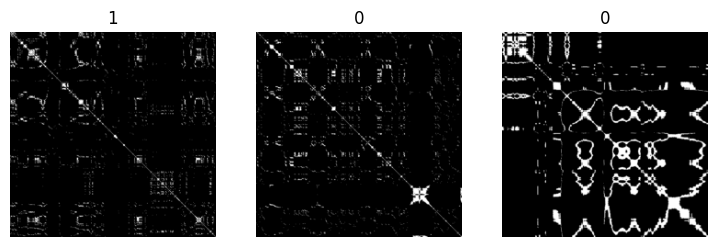

In [29]:
from fastai.vision.all import *
from torch import nn

# Definindo o modelo personalizado
class TrialModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 8, 5),          # 60 × 60 × 8
            nn.ReLU(),
            nn.AvgPool2d(3, stride=2),   # 29 × 29 × 8
            nn.Conv2d(8, 8, 5),          # 25 × 25 × 8
            nn.ReLU(),
            nn.AvgPool2d(3, stride=2),   # 12 × 12 × 8
            nn.Flatten()                 # 1152
        )

    def forward(self, x):
        return self.layers(x)

# Função para criar o modelo personalizado
def create_trial_model():
    return TrialModel()

# Função para obter os dataloaders
def get_dataloaders(fold, path_to_images, bs=32):
    """Cria ImageDataLoaders a partir do fold especificado."""
    train_df = folds[fold]["train"]

    dls = ImageDataLoaders.from_df(
        train_df,
        path=path_to_images,
        fn_col='fname',
        label_col='label',
        valid_pct=0.2,
        item_tfms=Resize(224),
        # batch_tfms=aug_transforms(),
        bs=bs
    )

    return dls

# Lista para armazenar as acurácias de cada fold
accuracies = []

for fold in range(len(folds)):
    dls = get_dataloaders(fold, IMAGES_DIR)
    # Exibir um batch de imagens
    dls.show_batch(max_n=3)

    # Criar modelo personalizado e treinar
    model = create_trial_model()
    learn = Learner(dls, model, metrics=accuracy)
    learn.fine_tune(50)

    # Avaliação no conjunto de teste
    test_df = folds[fold]["test"]
    test_dl = dls.test_dl(test_df["fname"].apply(lambda x: Path(IMAGES_DIR)/x))
    preds, _ = learn.get_preds(dl=test_dl)

    # Converter previsões para rótulos binários (classe com maior probabilidade)
    pred_labels = preds.argmax(dim=1)

    # Calcular acurácia no conjunto de teste
    test_acc = (pred_labels == tensor(test_df["label"].values)).float().mean().item()
    accuracies.append(test_acc)

    print(f"Fold {fold} - Acurácia no Teste: {test_acc:.4f}")

    print(f"Fold {fold} concluído!\n")

# Cálculo do desempenho médio
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\nDesempenho médio do modelo:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão da acurácia: {std_acc:.4f}")

print('1 - normal (pH greater or equal 7.15)')
print('0 - hypoxia (pH lower than 7.15)')

learn.show_results(max_n=6)

epoch,train_loss,valid_loss,accuracy,time


IndexError: Target 1 is out of bounds.

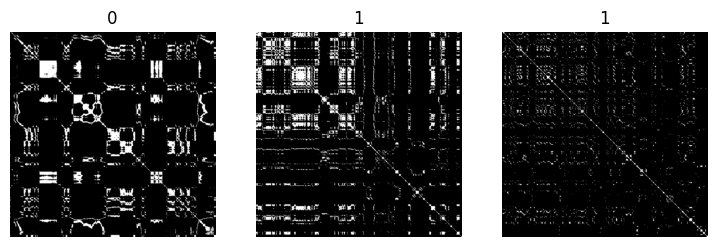

In [39]:
from fastai.vision.all import *
from torch import nn
import torch.nn.functional as F

# Definindo o modelo personalizado
class TrialModel(nn.Module):
    def __init__(self):
        super(TrialModel, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(64 * 64 * 64, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Função para criar o modelo personalizado
def create_trial_model():
    return TrialModel()

# Função para obter os dataloaders
def get_dataloaders(fold, path_to_images, bs=32):
    """Cria ImageDataLoaders a partir do fold especificado."""
    train_df = folds[fold]["train"]

    dls = ImageDataLoaders.from_df(
        train_df,
        path=path_to_images,
        fn_col='fname',
        label_col='label',
        valid_pct=0.2,
        item_tfms=Resize(512),
        # batch_tfms=aug_transforms(),
        bs=bs
    )

    return dls

# Lista para armazenar as acurácias de cada fold
accuracies = []

for fold in range(len(folds)):
    dls = get_dataloaders(fold, IMAGES_DIR)
    # Exibir um batch de imagens
    dls.show_batch(max_n=3)

    # Criar modelo personalizado e treinar
    model = create_trial_model()
    learn = Learner(dls, model, metrics=accuracy)
    learn.fine_tune(5)

    # Avaliação no conjunto de teste
    test_df = folds[fold]["test"]
    test_dl = dls.test_dl(test_df["fname"].apply(lambda x: Path(IMAGES_DIR)/x))
    preds, _ = learn.get_preds(dl=test_dl)

    # Converter previsões para rótulos binários (classe com maior probabilidade)
    pred_labels = preds.argmax(dim=1)

    # Calcular acurácia no conjunto de teste
    test_acc = (pred_labels == tensor(test_df["label"].values)).float().mean().item()
    accuracies.append(test_acc)

    print(f"Fold {fold} - Acurácia no Teste: {test_acc:.4f}")

    print(f"Fold {fold} concluído!\n")

# Cálculo do desempenho médio
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\nDesempenho médio do modelo:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão da acurácia: {std_acc:.4f}")

print('1 - normal (pH greater or equal 7.15)')
print('0 - hypoxia (pH lower than 7.15)')

learn.show_results(max_n=6)

1 - normal (pH greater or equal 7.15)
0 - hypoxia (pH lower than 7.15)


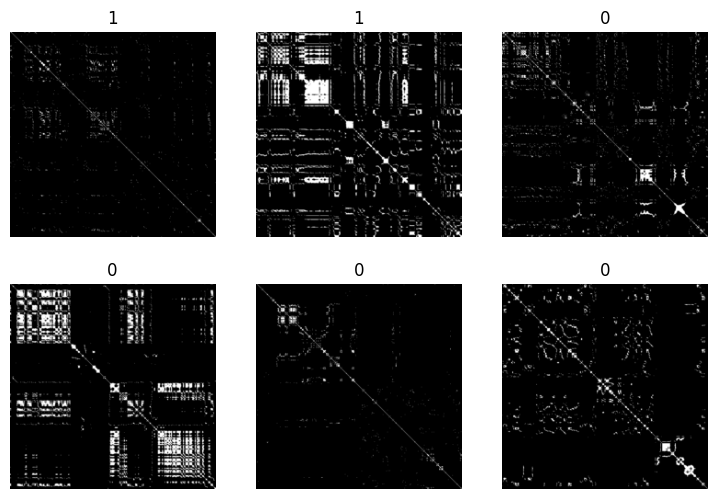

In [ ]:
dls = ImageDataLoaders.from_csv(images_path, 'labels.csv', valid_pct=0.2, seed=42, item_tfms=Resize(size))
print('1 - normal (pH greater or equal 7.15)')
print('0 - hypoxia (pH lower than 7.15)')
dls.show_batch(max_n=6)

In [ ]:
print(f'Train len = {len(dls.train.items)}')
print(f'Valid len = {len(dls.valid.items)}')
# dls.train.dataset
# dls.train.vocab
# xb, yb = dls.one_batch()
# print(f'xb.shape = {xb.shape}, yb.shape = {yb.shape}')

Train len = 504
Valid len = 126


In [ ]:
# train = ImageDataLoaders.from_csv(path, 'train_0.csv', item_tfms=Resize(size), train='train')
# valid = ImageDataLoaders.from_csv(path, 'valid_0.csv', item_tfms=Resize(size), valid='valid')

In [ ]:
# learn = vision_learner(dls, resnet50, metrics=error_rate)
# learn = vision_learner(dls, resnet34, metrics=error_rate)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)
learn.show_results(max_n=6)

epoch,train_loss,valid_loss,error_rate,time
0,1.301107,0.934913,0.460317,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.911502,0.752689,0.380952,00:06
1,0.771426,0.959094,0.388889,00:04
2,0.649096,1.122898,0.380952,00:04
3,0.534951,1.154177,0.373016,00:06


EOFError: 

In [ ]:
# x, y = dls.one_batch()
# y

In [ ]:
#learn.summary()

In [ ]:
# learn.fine_tune(2, base_lr=4e-5)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.007803,0.870359,0.257669,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.010487,1.062821,0.288344,00:08


EOFError: 

SuggestedLRs(valley=6.30957365501672e-05)

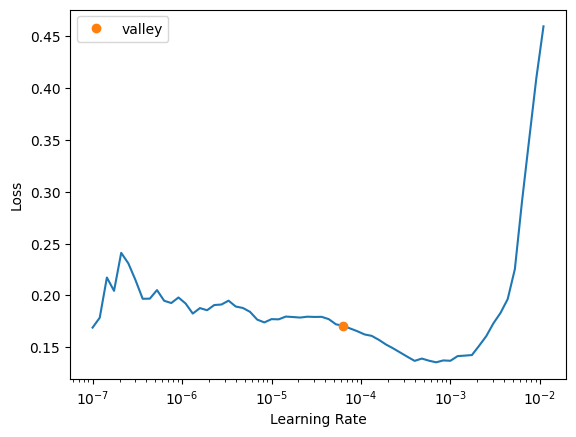

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100, 6e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.028624,1.244333,0.337423,00:07
1,0.040055,1.116743,0.288344,00:07
2,0.029141,1.094478,0.300613,00:08
3,0.021648,1.094266,0.312883,00:07
4,0.016453,1.096493,0.300613,00:07
5,0.014398,1.051827,0.276074,00:07
6,0.011579,0.987899,0.257669,00:08
7,0.009979,0.943889,0.251534,00:12
8,0.008790,0.938165,0.269939,00:08
9,0.007408,0.939426,0.257669,00:07


EOFError: 

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


SuggestedLRs(valley=1.4454397387453355e-05)

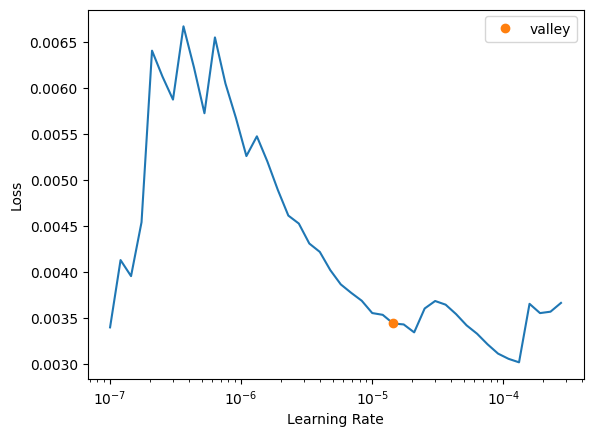

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, 1e-5)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

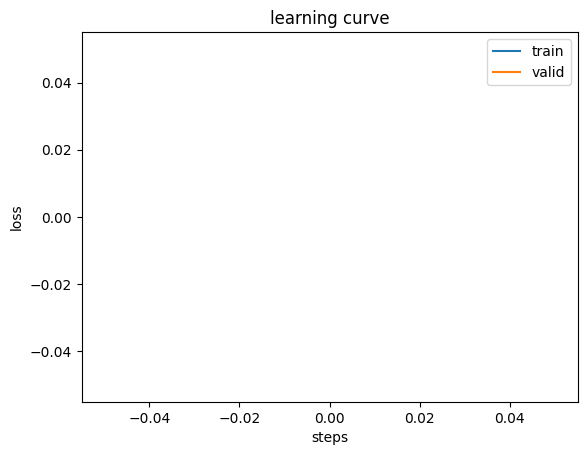

In [187]:
learn.recorder.plot_loss()

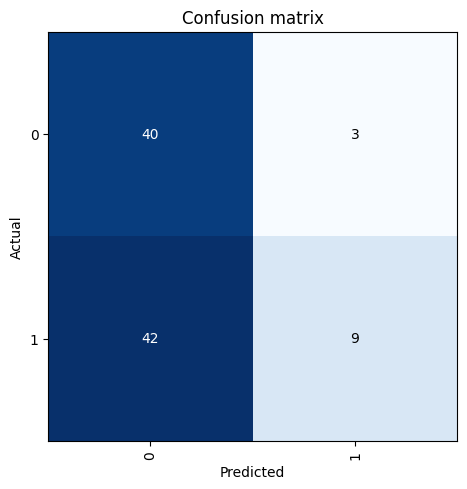

In [184]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

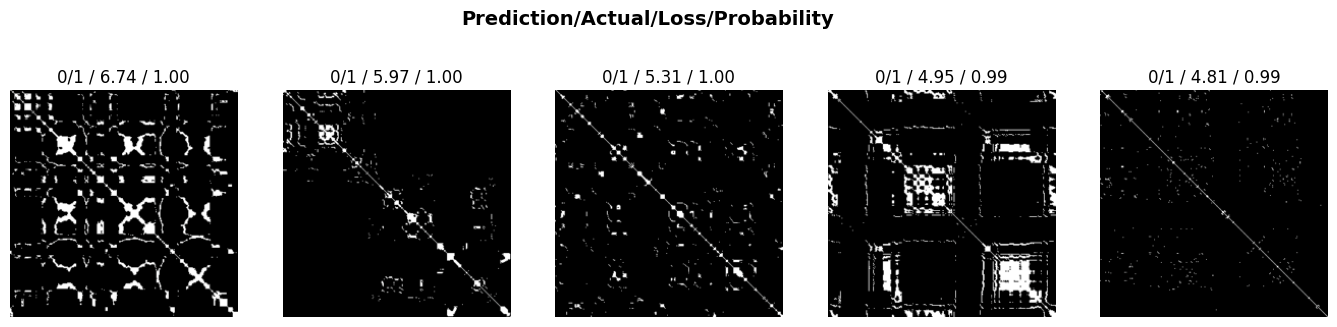

In [185]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
#learn.export('model.pkl')

In [186]:
db.batch_stats()

NameError: name 'db' is not defined

In [ ]:
print('nClass: {}    classes: {}'.format(db.c, db.classes))
db

nClass: 2    classes: [0, 1]


ImageDataBunch;

Train: LabelList (492 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: images;

Valid: LabelList (120 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: images;

Test: None

492 torch.Size([599, 599])


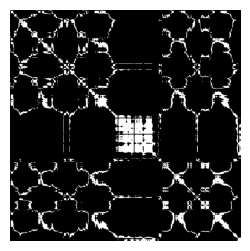

In [ ]:
im = train.get(-1)
print(len(train), im.size)
im.show()

## Define Model

In [ ]:
trial_model = nn.Sequential(
    nn.Sequential(
          nn.Conv2d(3,8,5),     # 60 × 60 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 29 × 29 × 8

          #nn.Dropout(p=0.25),
          nn.Conv2d(8,8,5),         # 25 × 25 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 12 × 12 × 8

          Flatten()         # 1152
    ),
    # removed model head to compute flatten size
)

In [ ]:
trial_learn = vision_learner(dls, trial_model, metrics=error_rate)

TypeError: ignored

In [ ]:
trial_learn = Learner(db, trial_model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
trial_learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 60, 60]          608        True      
______________________________________________________________________
ReLU                 [8, 60, 60]          0          False     
______________________________________________________________________
AvgPool2d            [8, 29, 29]          0          False     
______________________________________________________________________
Conv2d               [8, 25, 25]          1,608      True      
______________________________________________________________________
ReLU                 [8, 25, 25]          0          False     
______________________________________________________________________
AvgPool2d            [8, 12, 12]          0          False     
______________________________________________________________________
Flatten              [1152]               0          False     
___________________________________________________

In [ ]:
del trial_model
trial_learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [ ]:
mymodel = nn.Sequential(
    nn.Sequential(
          nn.Conv2d(3,8,5),     # 60 × 60 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 29 × 29 × 8

          #nn.Dropout(p=0.25),
          nn.Conv2d(8,8,5),         # 25 × 25 × 8
          nn.ReLU(),
          nn.AvgPool2d(3, stride=2),    # 12 × 12 × 8

          Flatten()         # 1152
    ),
    nn.Sequential(
#           nn.Dropout(p=0.25),
          nn.Linear(1152, 144),
          nn.ReLU(),
          nn.Dropout(p=0.8),
          nn.Linear(144, db.c)
    )
)

In [ ]:
learn = Learner(db, mymodel, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
learn.summary()
learn.save('initial')

## Train Model

In [ ]:
learn.fit_one_cycle(1, 1e-6)  # learn.fit_one_cycle(1, 0.01)

# learn.save('save-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.692546,0.694336,0.500000,00:02


In [ ]:
learn.lr_find(end_lr=1)
learn.recorder.plot()

Exception in thread Thread-41 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 54, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 31, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 360, in rebuild_storage_fd
    storage = cls._new_shared_fd_cpu(fd, size)
RuntimeError: unable to resize file <filename not specified> to the right size: Invalid argument (22)
Traceback (most recent call last):
  Fil

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 3e-3)  # learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.693622,0.694650,0.516667,00:02
1,0.692208,0.694810,0.475000,00:02


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 429, in reduce_storage
    df = multiprocessing.reduction.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 198, in DupFd
    return resource_sharer.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 48, in __init__
    new_fd = os.dup(fd)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiproc

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-0f21c5320763>", line 2, in <cell line: 2>
    learn.fit_one_cycle(100, 3e-3)  # learn.fit_one_cycle(1, 0.01)
  File "/usr/local/lib/python3.10/dist-packages/fastai/train.py", line 23, in fit_one_cycle
    learn.fit(cyc_len, max_lr, wd=wd, callbacks=callbacks)
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_train.py", line 200, in fit
    fit(epochs, self, metrics=self.metrics, callbacks=self.callbacks+callbacks)
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_train.py", line 99, in fit
    for xb,yb in progress_bar(learn.data.train_dl, parent=pbar):
  File "/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py", line 41, in __iter__
    for i,o in enumerate(self.gen):
  File "/usr/local/lib/python3.10/dist-packages/fastai/basic_

TypeError: ignored

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-2)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-3)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
learn.load('initial')
learn.fit_one_cycle(100, 1e-4)  # learn.fit_one_cycle(1, 0.01)

In [ ]:
#train an additional 100 epochs
learn.fit_one_cycle(100, 1e-4)  # learn.fit_one_cycle(1, 0.01)

## Examine Results

In [ ]:
gc.collect()

In [ ]:
# dls.dataset
# dls.dataloaders
# dls.train.items
# dls.valid.items
# dls.train.dataset
# dls.train.vocab
# train.items
# valid.items
# xb, yb = dls.one_batch()
# print(xb.shape,yb.shape)

(#490) [(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=880x880, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=595x595, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(0)),(PILImage mode=RGB size=899x899, TensorCategory(1)),(PILImage mode=RGB size=899x899, TensorCategory(0))...]